In [2]:
import numpy as np, matplotlib.pyplot as plt, torch as trc
import pandas as pd
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [496]:
data = pd.read_csv('dataset_lunapil_dec_mar.csv')
data = data.fillna(0)

dec_n = 1 #!!!
for i in range(3-dec_n):
    for col in data.columns:
        if col[4] == str(i):
            data = data.drop(col, axis=1)

data

,Form first,Form stable,Clear first,Clear full,x_I_2_0,x_S_2_0,x_T_2_0,x_F_2_0,x_U_2_0,x_V_2_0
0,0.0,0.0,2.0,1.0,0.976190,-1.689636,-13.033142,-1378.74080,0.396981,-2.768004
1,124.0,130.0,2.0,2.0,0.929040,-1.689911,-13.854736,-1892.50940,-0.392026,-1.545879
2,105.0,152.0,1.0,1.0,0.836465,-1.690063,-8.913391,-1344.54220,2.149252,-3.733351
3,136.0,145.0,1.0,1.0,0.905104,-1.689819,-8.922394,-1644.58070,0.465837,-1.023999
4,128.0,128.0,1.0,1.0,0.873365,-1.690033,-7.921204,-1789.38780,0.819801,-1.120654
5,137.0,141.0,0.0,0.0,0.529262,-1.292328,-8.037659,-1189.53630,-0.202729,-3.734922
6,126.0,126.0,2.0,1.0,0.874553,-1.690155,-6.312439,-1770.35550,-1.197339,0.885920
7,127.0,132.0,1.0,1.0,0.828195,-1.688568,-7.873871,-1632.23410,-0.532210,-0.518127
8,138.0,138.0,2.0,2.0,0.730530,-1.667908,-9.574524,-1531.95290,2.187770,-3.351915
9,129.0,129.0,1.0,0.0,0.850303,-1.689697,-4.139587,-1707.70800,-2.758655,-0.079360


In [497]:
# Adjust values
if dec_n == 3:
    cols_to_dec = ['Form first', 'Form stable', 'x_F_0_0', 'x_F_1_0', 'x_F_2_0']
elif dec_n == 2:
    cols_to_dec = ['Form first', 'Form stable', 'x_F_1_0', 'x_F_2_0']
elif dec_n == 1:
    cols_to_dec = ['Form first', 'Form stable', 'x_F_2_0']
else: print('Unsupported dec_n!')

# cols_to_dec = ['Clear first', 'Clear full', 'x_F_0_0', 'x_F_1_0', 'x_F_2_0']
for col in cols_to_dec:
    data[col] /= 100

In [498]:
# Drop values
vals_to_keep = ['Clear first', 'Clear full']

# Get vals with best corr:
val_n = 3
for i in list(abs(data.corr()['Clear full']).sort_values()[::-1].items()):
    if (val_n > 0) and (i[0] not in vals_to_keep):
        vals_to_keep.append(i[0])
        val_n -= 1
print(vals_to_keep)

for val in data.columns:
    if val not in vals_to_keep:
        data = data.drop(val, axis=1)

['Clear first', 'Clear full', 'x_S_2_0', 'x_V_2_0', 'Form first']


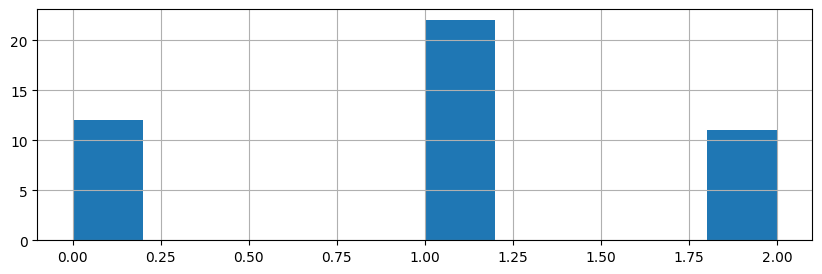

In [481]:
inertia = np.ones(len(data), dtype=int)
for i in range(1, len(inertia)):
    inertia[i] = data['Clear full'][i-1]
    # inertia[i] = data['Form first'][i-1]

data['inert'] = inertia
data.inert.hist();

In [482]:
dt_train, dt_test = train_test_split(data, test_size=0.21, shuffle=False, random_state=5)
# dt_train, dt_test = train_test_split(data, test_size=0.21, shuffle=True, random_state=5)
len(dt_train), len(dt_test)

(35, 10)

In [438]:
class WeatherDataset(trc.utils.data.Dataset):
  def __init__(self, data):
    self.X = trc.tensor(data.iloc[:, 2:-1].values, dtype=trc.float)
    self.y = trc.tensor(data['Clear full'].values, dtype=trc.long)
    # self.y = trc.tensor(data['Form first'].values, dtype=trc.long)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

class WeatherDataset_noise(trc.utils.data.Dataset):
  def __init__(self, data):
    self.X = trc.tensor(data.iloc[:, 2:-1].values, dtype=trc.float)
    self.y = trc.tensor(data['Clear full'].values, dtype=trc.long)
    # self.y = trc.tensor(data['Form first'].values, dtype=trc.long)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    x_n = len(self.X[idx])
    z_n_min, z_n_max = 1, x_n//2
    z_n = np.random.randint(z_n_min, z_n_max+1)
    mask = np.random.permutation([0]*z_n + [1]*(x_n-z_n))
    return (self.X[idx]*mask).float(), self.y[idx]

In [439]:
ds_train, ds_test = WeatherDataset(dt_train), WeatherDataset(dt_test)
len(ds_train), len(ds_test)

(35, 10)

In [440]:
len(ds_train[0][0]), ds_train[0][1]

(1, tensor(1))

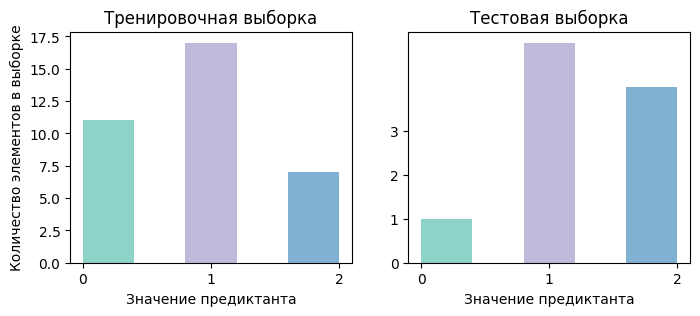

In [441]:
# plt.style.use('dark_background')
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(8, 3)
n, bins, patches = ax[0].hist([i[1] for i in ds_train], bins=5)
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.Set3(i))
ax[0].set_title('Тренировочная выборка')
ax[0].set_xlabel('Значение предиктанта')
ax[0].set_ylabel('Количество элементов в выборке')
ax[0].set_xticks([0, 1, 2])

n, bins, patches = ax[1].hist([i[1] for i in ds_test], bins=5)
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.Set3(i))
ax[1].set_title('Тестовая выборка')
ax[1].set_xlabel('Значение предиктанта')
ax[1].set_yticks([0, 1, 2, 3])
ax[1].set_xticks([0, 1, 2]);

In [442]:
batch_size = 10

train_dl = trc.utils.data.DataLoader(ds_train, batch_size, shuffle=True,
                                     pin_memory=True, drop_last=True)
test_dl = trc.utils.data.DataLoader(ds_test, len(ds_test),
                                    pin_memory=True)

# Net

In [443]:
class IceNet(trc.nn.Module):
  def __init__(self):
    super().__init__()

    p = 8
    self.fc_1 = trc.nn.Linear(1, 64//p)
    self.fc_2 = trc.nn.Linear(64//p, 128//p)
    self.fc_3 = trc.nn.Linear(128//p, 256//p)
    self.fc_4 = trc.nn.Linear(256//p, 128//p)
    self.fc_5 = trc.nn.Linear(128//p, 3)

    self.act = trc.nn.ReLU()

  def forward(self, x):
    # print(x.shape)
    x = self.act(self.fc_1(x))
    x = self.act(self.fc_2(x))
    x = self.act(self.fc_3(x))
    x = self.act(self.fc_4(x))
    return self.fc_5(x).squeeze()

In [444]:
np.random.seed(1)
trc.manual_seed(1)
trc.cuda.manual_seed(1)
trc.backends.cudnn.determenistic = True
device = ('cuda:0' if trc.cuda.is_available() else 'cpu')

net = IceNet().to(device)

loss = trc.nn.CrossEntropyLoss()
# loss = trc.nn.CrossEntropyLoss(weight=trc.tensor([3.0, 1.0, 2.0]))

if len(ds_train[0][0]) <= 2:
    optimizer = trc.optim.Adam(net.parameters(), lr=0.01, amsgrad=True, weight_decay=0)
else:
    optimizer = trc.optim.Adam(net.parameters(), lr=0.009, amsgrad=True, weight_decay=0)
# optimizer = trc.optim.NAdam(net.parameters(), lr=0.009)

scheduler = trc.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5)

device

'cpu'

# Learning

In [445]:
train_loss_hist, train_acc_hist = [], []
test_loss_hist, test_acc_hist = [], []
max_acc, min_loss = 0, 1000
lr_red, k = [0.8, 0.95], 0

for epoch in tqdm(range(200)):
  net.train()
  batch_n, loss_sum, acc_sum = 0, 0, 0

  for input, targets in train_dl:
    input = input.to(device)
    targets = targets.to(device)

    raw_out = net.forward(input)
    # print(raw_out.shape, targets.shape)
    # raw_out = raw_out.unsqueeze(0)
    loss_val = loss(raw_out, targets)
    loss_val.backward()

    loss_sum += loss_val.data.cpu()
    acc_sum += (raw_out.argmax(dim=1)==targets).float().mean()
    batch_n += 1

    optimizer.step()
    optimizer.zero_grad()

  train_loss_hist.append(loss_sum/batch_n)
  train_acc_hist.append(acc_sum/batch_n)
  net.eval()

  for input, targets in test_dl:
    input = input.to(device)
    targets = targets.to(device)

    with trc.set_grad_enabled(False):
      raw_out = net.forward(input)
      loss_val = loss(raw_out, targets).data.cpu()

    test_loss_hist.append(loss_val)
    test_acc_hist.append((raw_out.argmax(dim=1)==targets).float().mean())

    # if test_acc_hist[-1] >= max_acc and (len(test_loss_hist)==1 or loss_val <= test_loss_hist[-2]):
    # if test_acc_hist[-1] >= max_acc:
    # if test_acc_hist[-1] > max_acc:
    if test_acc_hist[-1] >= max_acc:
      trc.save(net, 'ice_model')
      max_acc = test_acc_hist[-1]
      '''if k < len(lr_red) and max_acc >= lr_red[k]:
        scheduler.step()
        k+=1'''

    if loss_val < min_loss:
      min_loss = loss_val
      # print(min_loss.item())
      '''if min_loss.item() <= 0.5679 and max_acc >= lr_red[k]:
        print('---lr_reduction---')
        scheduler.step()
        k+=1'''

100%|██████████| 200/200 [00:01<00:00, 135.80it/s]


# Statistics

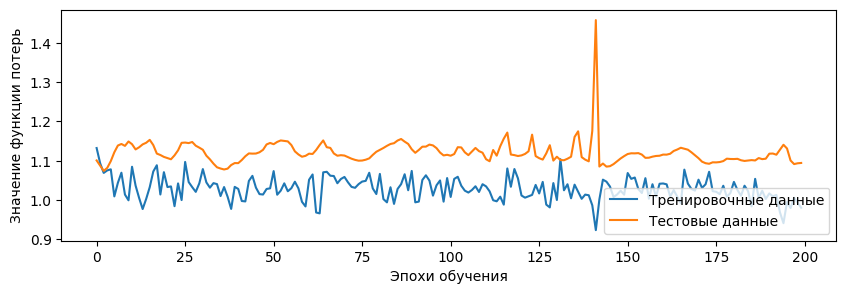

In [446]:
# plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10, 3)
plt.plot(train_loss_hist, label='Тренировочные данные')
plt.plot(test_loss_hist, label='Тестовые данные')
# plt.title('Loss')
plt.xlabel('Эпохи обучения')
plt.ylabel('Значение функции потерь')
plt.legend(loc='lower right');

Best delay_0: 0.2158 (lr - 0.009, batch - 2)<br>
Best delay_month: 0.6276 (lr - 0.009, batch - 3)

In [447]:
print(min(test_loss_hist), min_loss)

tensor(1.0739) tensor(1.0739)


In [448]:
min_loss

tensor(1.0739)

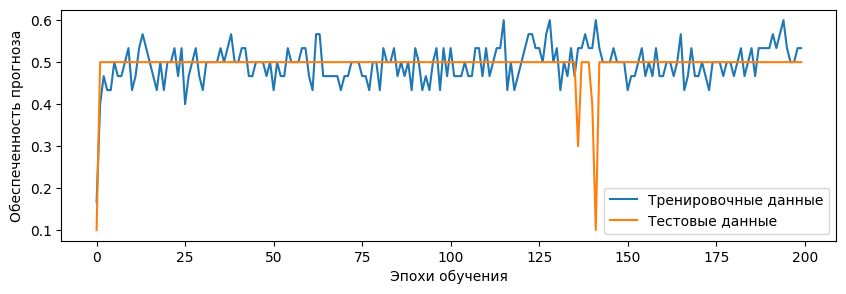

In [449]:
plt.plot(train_acc_hist, label='Тренировочные данные')
plt.plot(test_acc_hist, label='Тестовые данные')
# plt.title('Acc')
plt.xlabel('Эпохи обучения')
plt.ylabel('Обеспеченность прогноза')
plt.legend();

# Testing

In [450]:
net = trc.load('ice_model')
train_tst_dl = trc.utils.data.DataLoader(ds_train, len(ds_train), shuffle=False, pin_memory=True)

preds, targets = [], []
for x, y in train_tst_dl:
    x = x.to(device)
    y = y.to(device)

    raw_out = net.forward(x)
    preds.append(raw_out.argmax(dim=1))
    targets.append(y)

print(classification_report(trc.cat(targets), trc.cat(preds)))

              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.50      0.94      0.65        17
           2       0.00      0.00      0.00         7

    accuracy                           0.51        35
   macro avg       0.39      0.37      0.31        35
weighted avg       0.45      0.51      0.41        35



c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [451]:
print(trc.cat(targets))
print(trc.cat(preds))

tensor([1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2,
        1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1])
tensor([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])


In [452]:
preds, targets = [], []
for x, y in test_dl:
    x = x.to(device)
    y = y.to(device)

    raw_out = net.forward(x)
    preds.append(raw_out.argmax(dim=1))
    targets.append(y)

print(classification_report(trc.cat(targets), trc.cat(preds)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         4

    accuracy                           0.50        10
   macro avg       0.17      0.33      0.22        10
weighted avg       0.25      0.50      0.33        10



c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [432]:
print(trc.cat(targets))
print(trc.cat(preds))

tensor([1, 1, 2, 1, 1, 0, 2, 2, 2, 1])
tensor([1, 2, 1, 1, 1, 0, 1, 2, 1, 1])


In [409]:
pytorch_total_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
pytorch_total_params

8691

### Прогноз 2024

In [ ]:
# DEC1-JAN2
from datetime import date

d0 = date(2023, 8, 1)

# DEFINE DATE
# Ani
d_frst, d_stbl = date(2023, 12, 30), date(2024, 1, 9)
# LunaPil
# d_frst, d_stbl = date(2023, 11, 24), date(2023, 11, 24)

form_frst, form_stbl = (d_frst-d0).days, (d_stbl-d0).days
print(form_frst, form_stbl)
x = trc.Tensor([form_frst, form_stbl,
    0.0011175164, 2.0403712, -5.81546, -1.12584294, 2.2276535, -4.385736,
    0.019494873, 0.88759154, -5.356842, -1.67678186, 0.78476363, -2.8122842,
    0.05983783, -0.25621745, -7.976349, -2.35051126, -1.2692935, -3.2868123])
'''x = trc.Tensor([form_frst, form_stbl,
    0.0011175164, 2.0403712, -5.81546, 2.2276535, -4.385736,
    0.019494873, 0.88759154, -5.356842, 0.78476363, -2.8122842,
    0.05983783, -0.25621745, -7.976349, -1.2692935, -3.2868123])'''
x = x.to(device)
net.forward(x) #.argmax()

In [884]:
# JAN
from datetime import date

d0 = date(2023, 8, 1)

# DEFINE DATE
# ANIVA
# d_frst, d_stbl = date(2023, 12, 30), date(2024, 1, 9)
# LUNAPIL
d_frst, d_stbl = date(2023, 11, 12), date(2023, 11, 24)

form_frst, form_stbl = (d_frst-d0).days, (d_stbl-d0).days
print(form_frst, form_stbl)
# ANIVA
'''x = trc.Tensor([form_frst, form_stbl,
    0.019494873, 0.88759154, -5.356842, -1.67678186, 0.78476363, -2.8122842,
    0.05983783, -0.25621745, -7.976349, -2.35051126, -1.2692935, -3.2868123,
    0.23460168, -1.4132556, -5.436676, -3.14909332, -2.5164437, -6.9422836])'''
'''x = trc.Tensor([form_frst, form_stbl,
    0.019494873, 0.88759154, -5.356842, 0.78476363, -2.8122842,
    0.05983783, -0.25621745, -7.976349, -1.2692935, -3.2868123,
    0.23460168, -1.4132556, -5.436676, -2.5164437, -6.9422836])'''


# LUNAPIL
x = trc.Tensor([form_frst, form_stbl,
    0.93202, -1.755427, -19.863541, -4.3087288, 3.020164, -1.384673,
    0.966036, -1.767221, -22.226074, -6.33822968, 3.210279, -2.439723,
    0.978068, -1.77064, -16.017212, -8.57531434, 1.362164, -4.534626])
x = x.to(device)
net.forward(x) #.argmax()

103 115


tensor([-1110.8264,  -216.2571,   726.5462], grad_fn=<SqueezeBackward0>)

In [26]:
# FEB
from datetime import date

d0 = date(2023, 8, 1)

# DEFINE DATE
# ANIVA
# d_frst, d_stbl = date(2023, 12, 30), date(2024, 1, 9)
# LUNAPIL
d_frst, d_stbl = date(2023, 11, 12), date(2023, 11, 24)

form_frst, form_stbl = (d_frst-d0).days, (d_stbl-d0).days
print(form_frst, form_stbl)

# ANIVA
''''''

# LUNAPIL
x = trc.Tensor([form_frst, form_stbl,
    0.97686, -1.773324, -19.025162, -10.28321894, 4.27923, -3.426963,
    0.984553, -1.773935, -18.848236, -12.19541011, 1.580032, -1.511605,
    0.977293, -1.775542, -19.901337, -14.10725093, 3.267457, -2.086021])
x = x.to(device)
net.forward(x) #.argmax()

103 115


tensor([-1666.2806,   169.9275,  1199.6879], grad_fn=<SqueezeBackward0>)

In [23]:
# MAR
from datetime import date

d0 = date(2023, 8, 1)

# DEFINE DATE
# ANIVA
# d_frst, d_stbl = date(2023, 12, 30), date(2024, 1, 9)
# LUNAPIL
d_frst, d_stbl = date(2023, 11, 12), date(2023, 11, 24)

form_frst, form_stbl = (d_frst-d0).days, (d_stbl-d0).days
print(form_frst, form_stbl)

# ANIVA
''''''

# LUNAPIL
x = trc.Tensor([form_frst, form_stbl,
    0.962193, -1.775925, -15.686371, -15.83781373, 2.832284, -0.871869,
    0.945765, -1.774578, -10.871216, -17.3771985, 3.254466, -3.624539,
    0.828608, -1.759492, -4.373871, -18.40402711, -1.111412, 1.592968])
x = x.to(device)
net.forward(x) #.argmax()

103 115


tensor([-864.3125,    2.0919,  606.0002], grad_fn=<SqueezeBackward0>)

In [71]:
# MAR2_APR1
from datetime import date

d0 = date(2023, 8, 1)

# DEFINE DATE
# ANIVA
# d_frst, d_stbl = date(2023, 12, 30), date(2024, 1, 9)
# LUNAPIL
d_frst, d_stbl = date(2023, 11, 12), date(2023, 11, 24)

form_frst, form_stbl = (d_frst-d0).days, (d_stbl-d0).days
print(form_frst, form_stbl)

# ANIVA
''''''

# LUNAPIL
x = trc.Tensor([form_frst, form_stbl,
    0.942751, -1.774578, -10.871216, -17.3771985, 3.254466, -3.624539,
    0.815467, -1.735291, -4.373871, -18.40402711, -1.111412, 1.592968,
    0.746119, -1.708638, -2.831635, -18.82005128, 2.288941, -0.544465])
x = x.to(device)
net.forward(x) #.argmax()

103 115


tensor([-694.2429,   67.3273,  305.6068], grad_fn=<SqueezeBackward0>)

In [75]:
# MAR1_APR2
from datetime import date

d0 = date(2023, 8, 1)

# DEFINE DATE
# ANIVA
# d_frst, d_stbl = date(2023, 12, 30), date(2024, 1, 9)
# LUNAPIL
d_frst, d_stbl = date(2023, 11, 12), date(2023, 11, 24)

form_frst, form_stbl = (d_frst-d0).days, (d_stbl-d0).days
print(form_frst, form_stbl)

# ANIVA
''''''

# LUNAPIL
x = trc.Tensor([form_frst, form_stbl,
    0.815467, -1.759492, -4.373871, -18.40402711, -1.111412, 1.592968,
    0.746119, -1.705041, -2.831635, -18.82005128, 2.288941, -0.544465,
    0.618521, -1.596134, 0.196716, -19.09374268, -1.33937, 0.557073])
x = x.to(device)
net.forward(x)#.argmax()

103 115


tensor([-317.6725,   92.2886,  214.1907], grad_fn=<SqueezeBackward0>)

# XGBoost

In [23]:
from xgboost import XGBClassifier

In [24]:
# create model instance
bst = XGBClassifier(n_estimators=20, max_depth=4, learning_rate=0.5, objective='cls:ce')
# fit model
bst.fit(ds_train.X, ds_train.y)
# make predictions
preds_train = bst.predict(ds_train.X)
preds_test = bst.predict(ds_test.X)

In [25]:
print(classification_report(ds_train.y, preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [26]:
print(classification_report(ds_test.y, preds_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.57      0.80      0.67         5
           2       0.00      0.00      0.00         2

    accuracy                           0.56         9
   macro avg       0.52      0.43      0.44         9
weighted avg       0.54      0.56      0.52         9



# Sklearn

In [27]:
from sklearn.ensemble import RandomForestClassifier
import joblib

In [28]:
# create model instance
rfs = RandomForestClassifier(n_estimators=100, max_depth=8, criterion='entropy')
# fit model
rfs.fit(ds_train.X, ds_train.y)
# make predictions
preds_train = rfs.predict(ds_train.X)
preds_test = rfs.predict(ds_test.X)

In [29]:
print(classification_report(ds_train.y, preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [30]:
print(classification_report(ds_test.y, preds_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.80      0.62         5
           2       0.00      0.00      0.00         2

    accuracy                           0.44         9
   macro avg       0.17      0.27      0.21         9
weighted avg       0.28      0.44      0.34         9



c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Climat & Inertia

### Test

In [54]:
print(classification_report(ds_test.y, np.ones(len(ds_test.y), dtype=int)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      1.00      0.50         3
           2       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.11      0.33      0.17         9
weighted avg       0.11      0.33      0.17         9



c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [55]:
print(classification_report(ds_test.y, dt_test.inert))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.25      0.33      0.29         3
           2       0.00      0.00      0.00         3

    accuracy                           0.11         9
   macro avg       0.08      0.11      0.10         9
weighted avg       0.08      0.11      0.10         9



### Train

In [56]:
print(classification_report(ds_train.y, np.ones(len(ds_train.y), dtype=int)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.77        20
           2       0.00      0.00      0.00         7

    accuracy                           0.62        32
   macro avg       0.21      0.33      0.26        32
weighted avg       0.39      0.62      0.48        32



c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [57]:
print(classification_report(ds_train.y, dt_train.inert))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.55      0.55      0.55        20
           2       0.14      0.14      0.14         7

    accuracy                           0.38        32
   macro avg       0.23      0.23      0.23        32
weighted avg       0.38      0.38      0.38        32



### All

In [30]:
print(classification_report(data['Clear full'], np.ones(len(data), dtype=int)))
# print(classification_report(data['Form first'], np.ones(len(data), dtype=int)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.44      1.00      0.61        18
         2.0       0.00      0.00      0.00        13

    accuracy                           0.44        41
   macro avg       0.15      0.33      0.20        41
weighted avg       0.19      0.44      0.27        41



c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [31]:
print(classification_report(data['Clear full'], data['inert']))
# print(classification_report(data['Form first'], data['inert']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.45      1.00      0.62        18
         2.0       0.00      0.00      0.00        13

    accuracy                           0.44        41
   macro avg       0.15      0.33      0.21        41
weighted avg       0.20      0.44      0.27        41



c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Viktor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,